In [ ]:
#install packages
!pip install datasets
!pip install pandas
!pip install imbalanced-learn
!pip install lime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load dataset into pandas DataFrame
train_df = pd.read_csv("panic_disorder_dataset_training.csv")
test_df = pd.read_csv("panic_disorder_dataset_testing.csv")
# Display the first few rows of the DataFrame
print(train_df.head())


   Participant ID  Age  Gender Family History Personal History  \
0               1   38    Male             No              Yes   
1               2   51    Male             No               No   
2               3   32  Female            Yes               No   
3               4   64  Female             No               No   
4               5   31    Male            Yes               No   

  Current Stressors             Symptoms  Severity Impact on Life  \
0          Moderate  Shortness of breath      Mild           Mild   
1              High        Panic attacks      Mild           Mild   
2              High        Panic attacks      Mild    Significant   
3          Moderate           Chest pain  Moderate       Moderate   
4          Moderate        Panic attacks      Mild       Moderate   

  Demographics Medical History  Psychiatric History Substance Use  \
0        Rural        Diabetes     Bipolar disorder           NaN   
1        Urban          Asthma     Anxiety disorde

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            100000 non-null  int64 
 1   Age                       100000 non-null  int64 
 2   Gender                    100000 non-null  object
 3   Family History            100000 non-null  object
 4   Personal History          100000 non-null  object
 5   Current Stressors         100000 non-null  object
 6   Symptoms                  100000 non-null  object
 7   Severity                  100000 non-null  object
 8   Impact on Life            100000 non-null  object
 9   Demographics              100000 non-null  object
 10  Medical History           74827 non-null   object
 11  Psychiatric History       75079 non-null   object
 12  Substance Use             66626 non-null   object
 13  Coping Mechanisms         100000 non-null  object
 14  Socia

In [ ]:
train_df.shape, test_df.shape

((100000, 17), (20000, 17))

In [ ]:
train_df.drop(columns="Participant ID", inplace=True)
test_df.drop(columns="Participant ID", inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50257 entries, 0 to 50256
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50257 non-null  int64  
 1   Gender                    50257 non-null  object 
 2   Family History            50257 non-null  object 
 3   Personal History          50257 non-null  object 
 4   Current Stressors         50257 non-null  object 
 5   Symptoms                  50256 non-null  object 
 6   Severity                  50256 non-null  object 
 7   Impact on Life            50256 non-null  object 
 8   Demographics              50256 non-null  object 
 9   Medical History           37553 non-null  object 
 10  Psychiatric History       37726 non-null  object 
 11  Substance Use             33591 non-null  object 
 12  Coping Mechanisms         50256 non-null  object 
 13  Social Support            50256 non-null  object 
 14  Lifest

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       20000 non-null  int64 
 1   Gender                    20000 non-null  object
 2   Family History            20000 non-null  object
 3   Personal History          20000 non-null  object
 4   Current Stressors         20000 non-null  object
 5   Symptoms                  20000 non-null  object
 6   Severity                  20000 non-null  object
 7   Impact on Life            20000 non-null  object
 8   Demographics              20000 non-null  object
 9   Medical History           14999 non-null  object
 10  Psychiatric History       15011 non-null  object
 11  Substance Use             13383 non-null  object
 12  Coping Mechanisms         20000 non-null  object
 13  Social Support            20000 non-null  object
 14  Lifestyle Factors     

In [ ]:
from sklearn.impute import SimpleImputer
#Data imputation
# Fill missing values with 'Unknown'
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
train_df[['Medical History', 'Psychiatric History', 'Substance Use']] = imputer.fit_transform(train_df[['Medical History', 'Psychiatric History', 'Substance Use']])

In [ ]:
#One Hot Encoding Train data
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Extract the "Age" column
age_train = train_df.loc[:, "Age"].copy().reset_index(drop=True)

# Identify categorical columns
categorical_columns_train = train_df.select_dtypes(include=['object']).columns

# Initialize and apply OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_categorical_encoded = encoder.fit_transform(train_df[categorical_columns_train])

# Create a DataFrame for the encoded features
X_train_encoded = pd.DataFrame(X_train_categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns_train))

# Combine the encoded features with the "Age" column
X_train_preprocessed = pd.concat([X_train_encoded, age_train], axis=1)

# Display the first few rows of the preprocessed training set
X_train_preprocessed.head()


,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,38
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,51
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,32
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,64
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,31


In [ ]:
# #One Hot Encoding Test data
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder

# age_test = test_df.loc[:, "Age"].copy().reset_index(drop=True)
# categorical_columns_test = test_df.select_dtypes(include=['object']).columns

# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# X_test_categorical_encoded = encoder.fit_transform(test_df[categorical_columns_test])
# X_test_encoded = pd.DataFrame(X_test_categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns_test))
# X_test_preprocessed = pd.concat([X_test_encoded, age_test], axis=1)

# X_test_preprocessed.head()


,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,41
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,20
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,32
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,41
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36


In [ ]:
#Dataset Scaling
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the entire dataset
X_train_preprocessed["Age"] = scaler.fit_transform(X_train_preprocessed["Age"].values.reshape(-1, 1))

X_train_preprocessed.head()


,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.249604
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.689761
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.683157
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.629126
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.755416


In [ ]:
# # Standardization of "Age" in the test set
# scaler = StandardScaler()
# X_test_preprocessed["Age"] = scaler.fit_transform(X_test_preprocessed["Age"].values.reshape(-1, 1))

# X_test_preprocessed.head()

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.035230
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.547389
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.683298
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.035230
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.395268


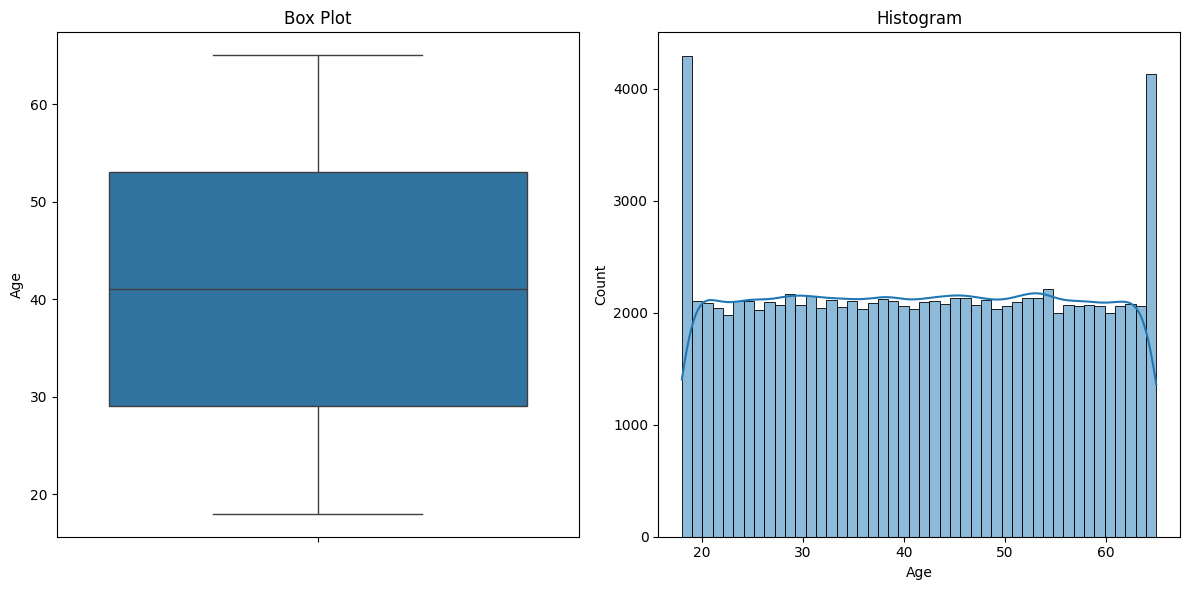

count    100000.000000
mean         41.454300
std          13.839204
min          18.000000
25%          29.000000
50%          41.000000
75%          53.000000
max          65.000000
Name: Age, dtype: float64

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
column="Age"

# Box Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=train_df[column])
plt.title('Box Plot')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=train_df, x=column, kde=True)
plt.title('Histogram')

plt.tight_layout()
plt.show()

train_df[column].describe()

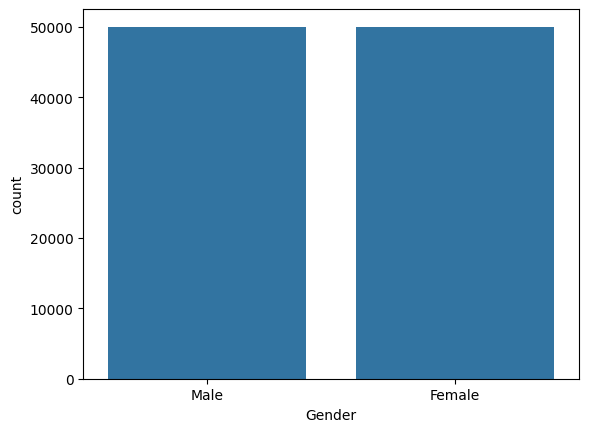

Gender
Male      50052
Female    49948
Name: count, dtype: int64

In [ ]:
sns.countplot(data=train_df, x="Gender")
plt.show()

train_df["Gender"].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target variable
y_train = train_df['Panic Disorder Diagnosis']

# Split the data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_preprocessed, y_train, test_size=0.2, random_state=42, stratify=y_train)


In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 11644 to 52600
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Gender_Female                            20000 non-null  float64
 1   Gender_Male                              20000 non-null  float64
 2   Family History_No                        20000 non-null  float64
 3   Family History_Yes                       20000 non-null  float64
 4   Personal History_No                      20000 non-null  float64
 5   Personal History_Yes                     20000 non-null  float64
 6   Current Stressors_High                   20000 non-null  float64
 7   Current Stressors_Low                    20000 non-null  float64
 8   Current Stressors_Moderate               20000 non-null  float64
 9   Symptoms_Chest pain                      20000 non-null  float64
 10  Symptoms_Dizziness                       20000 

In [ ]:
#Feature selection
# Calculate the correlation matrix for the training set
correlation_matrix = X_train_final.corr()

# Display the correlation matrix
print(correlation_matrix)


                                         Gender_Female  Gender_Male  \
Gender_Female                                 1.000000    -1.000000   
Gender_Male                                  -1.000000     1.000000   
Family History_No                             0.007774    -0.007774   
Family History_Yes                           -0.007774     0.007774   
Personal History_No                          -0.000399     0.000399   
Personal History_Yes                          0.000399    -0.000399   
Current Stressors_High                        0.002130    -0.002130   
Current Stressors_Low                         0.000486    -0.000486   
Current Stressors_Moderate                   -0.002615     0.002615   
Symptoms_Chest pain                          -0.003884     0.003884   
Symptoms_Dizziness                            0.001441    -0.001441   
Symptoms_Fear of losing control               0.003125    -0.003125   
Symptoms_Panic attacks                       -0.001378     0.001378   
Sympto

In [ ]:
threshold = 0.8
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_pairs.append((colname_i, colname_j))

print("Highly correlated pairs of features:")
for pair in highly_correlated_pairs:
    print(pair)


Highly correlated pairs of features:
('Gender_Male', 'Gender_Female')
('Family History_Yes', 'Family History_No')
('Personal History_Yes', 'Personal History_No')
('Demographics_Urban', 'Demographics_Rural')


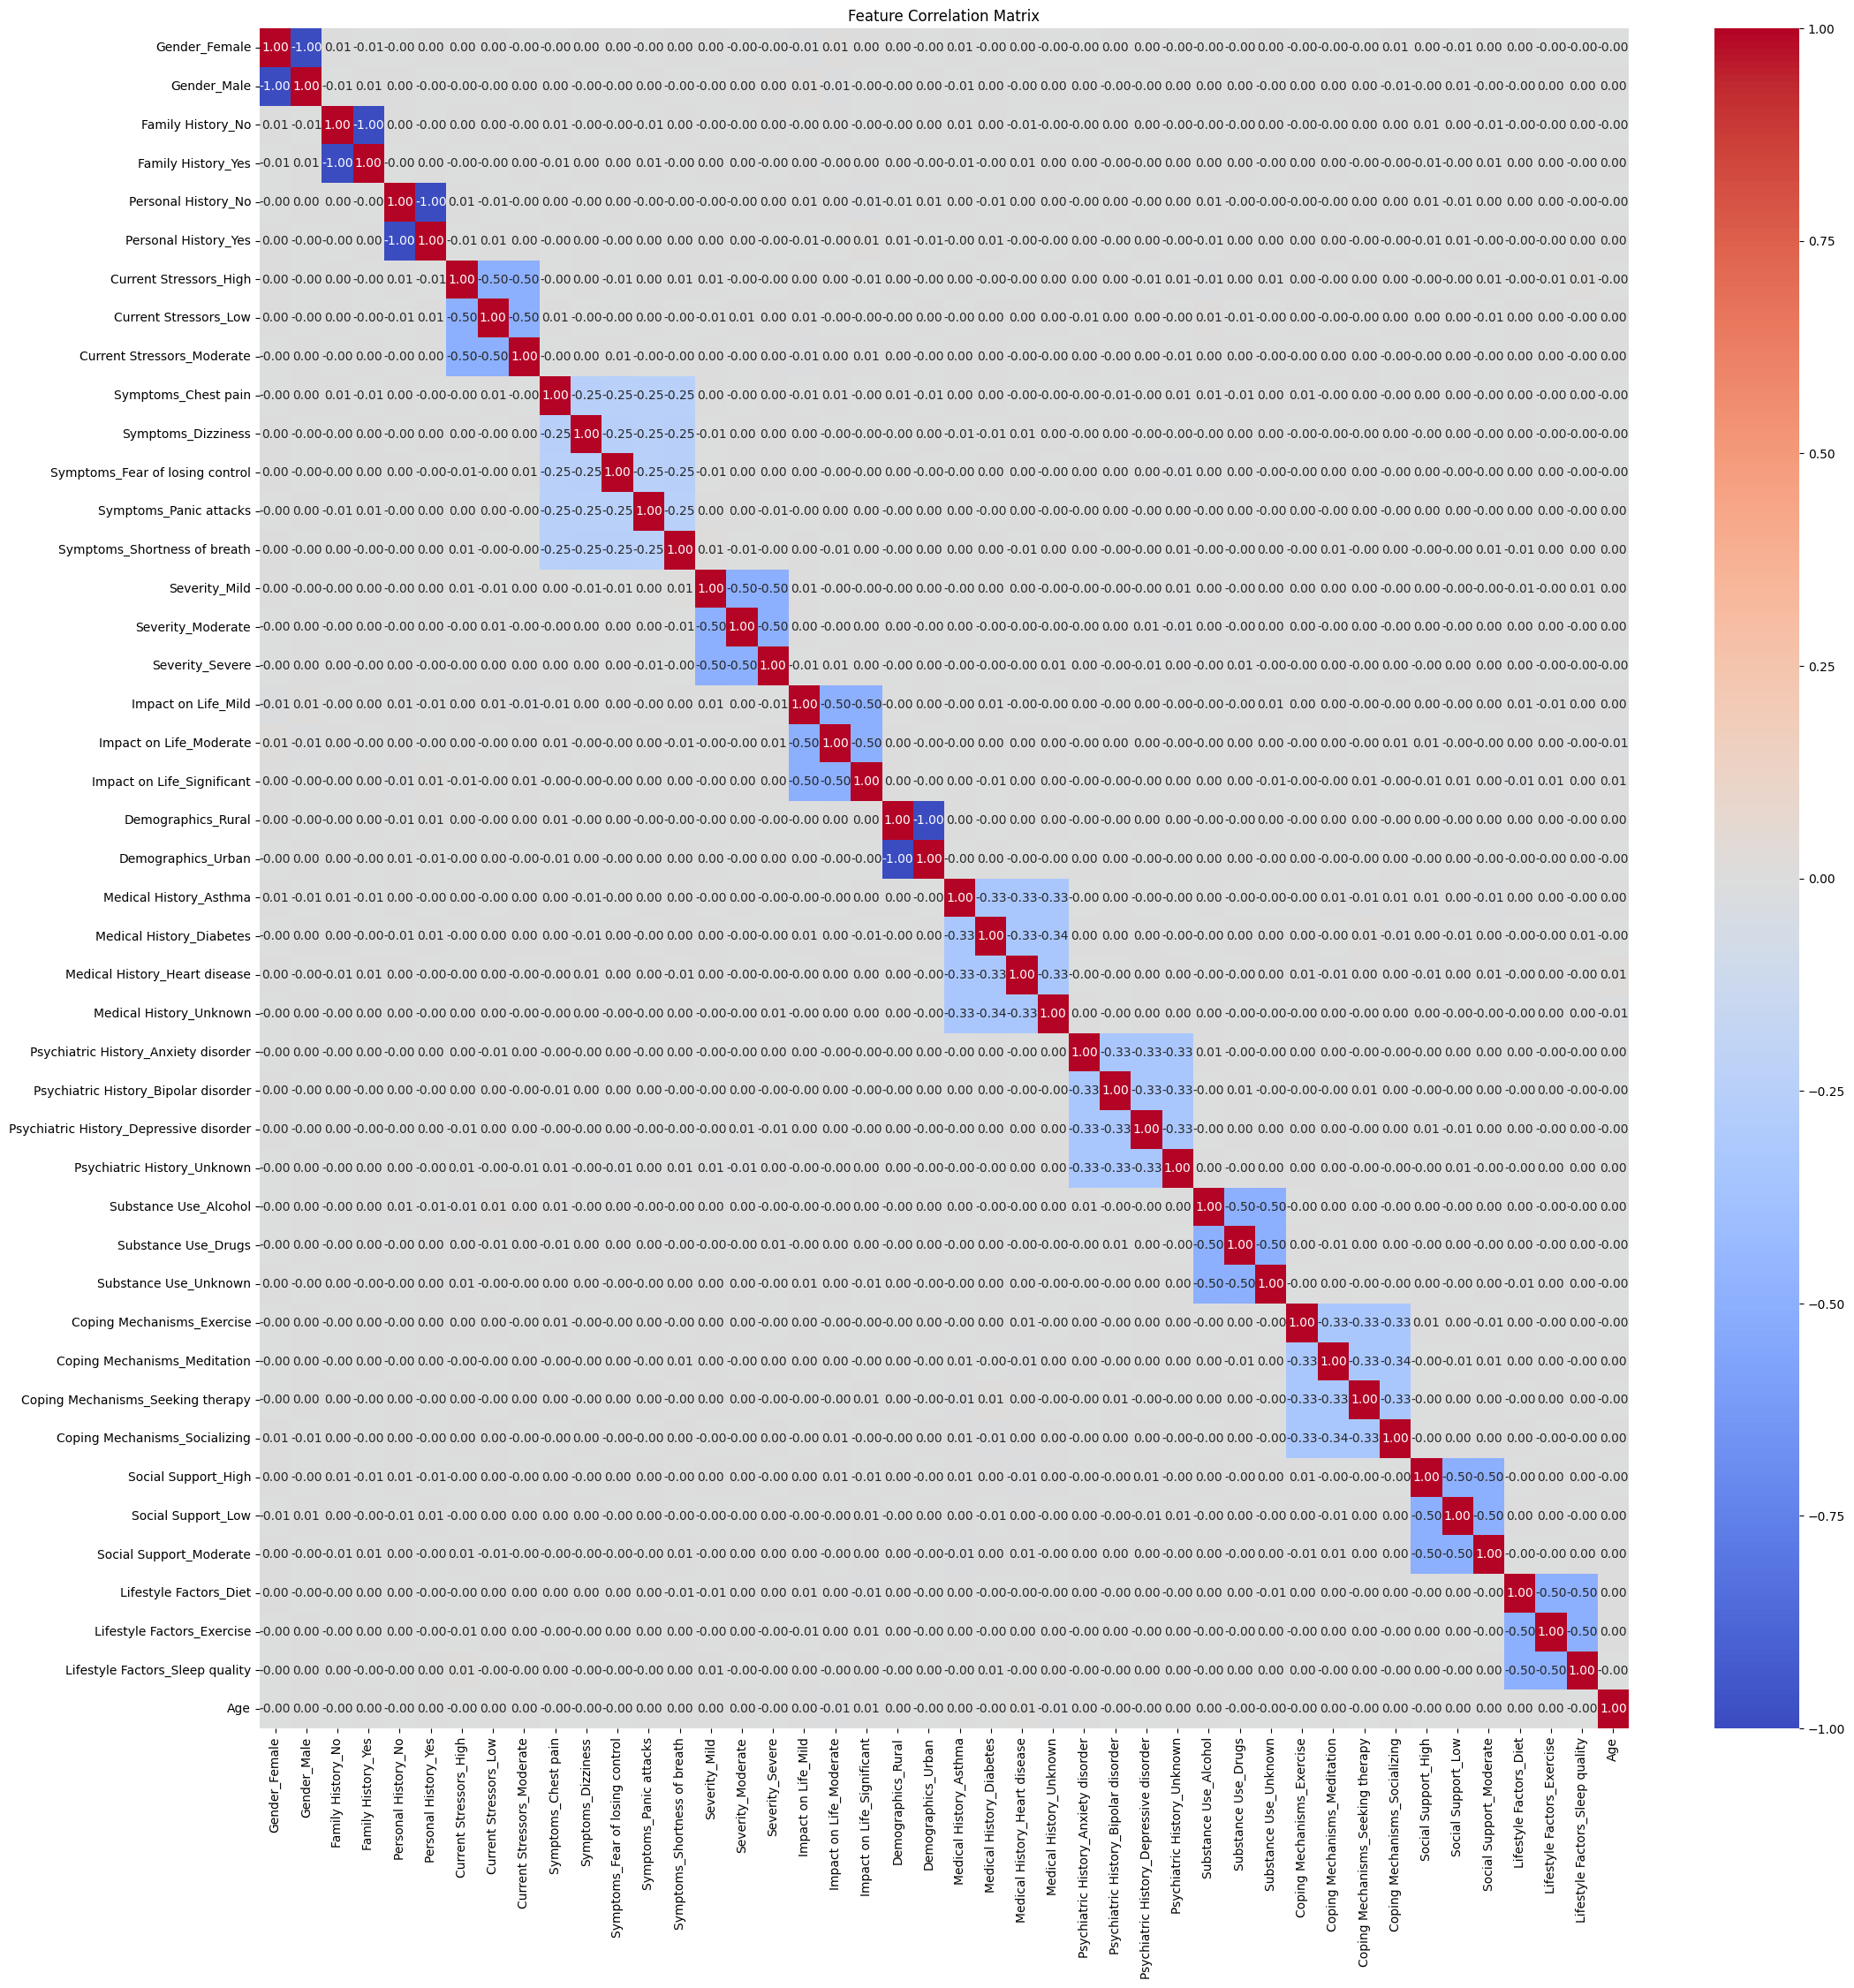

In [ ]:
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
features_to_drop = set()
for pair in highly_correlated_pairs:
    features_to_drop.add(pair[1])  # Or pair[0], depending on which feature you want to keep

X_train_dropped = X_train_final.drop(columns=features_to_drop)
X_test_dropped = X_val.drop(columns=features_to_drop)

print(f"Dropped features: {features_to_drop}")


Dropped features: {'Personal History_No', 'Family History_No', 'Gender_Female', 'Demographics_Rural'}


In [ ]:
X_train_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 67800 to 76666
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Gender_Male                              80000 non-null  float64
 1   Family History_Yes                       80000 non-null  float64
 2   Personal History_Yes                     80000 non-null  float64
 3   Current Stressors_High                   80000 non-null  float64
 4   Current Stressors_Low                    80000 non-null  float64
 5   Current Stressors_Moderate               80000 non-null  float64
 6   Symptoms_Chest pain                      80000 non-null  float64
 7   Symptoms_Dizziness                       80000 non-null  float64
 8   Symptoms_Fear of losing control          80000 non-null  float64
 9   Symptoms_Panic attacks                   80000 non-null  float64
 10  Symptoms_Shortness of breath             80000 

In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_final, y_train_final)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_final, y_train_final)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
y_val_pred_dt = dt_model.predict(X_val)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_val, y_val_pred_dt)}')
print(classification_report(y_val, y_val_pred_dt))


Accuracy: 0.99965
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19143
           1       1.00      0.99      1.00       857

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# Initialize the Grid Search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train_final, y_train_final)

# # Best parameters found by Grid Search
print(grid_search.best_params_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
y_val_pred_dt2 = dt_model.predict(X_val)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_val, y_val_pred_dt2)}')
print(classification_report(y_val, y_val_pred_dt2))

Accuracy: 0.99965
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19143
           1       1.00      0.99      1.00       857

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
print("Best estimator Decision Tree: ",grid_search.best_params_)

Best estimator Decision Tree:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# # Initialize the classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the model
rf_model.fit(X_train_final, y_train_final)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_val, y_val_pred_rf)}')
print(classification_report(y_val, y_val_pred_rf))


Accuracy: 0.99945
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19143
           1       1.00      0.99      0.99       857

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize the Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train_final, y_train_final)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
y_val_pred_rf2 = rf_model.predict(X_val)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_val, y_val_pred_rf2)}')
print(classification_report(y_val, y_val_pred_rf2))

Accuracy: 0.99945
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19143
           1       1.00      0.99      0.99       857

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
print("Best estimator Random Forest: ",grid_search.best_params_)

Best estimator Random Forest:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 300}


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train_final, y_train_final)

GradientBoostingClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_val_pred_gb = gb_model.predict(X_val)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_val, y_val_pred_gb)}')
print(classification_report(y_val, y_val_pred_gb))

Accuracy: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19143
           1       1.00      1.00      1.00       857

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    "loss": ["deviance"],
    "learning_rate": [0.01, 0.1],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 4],
    "max_depth": [3, 5],
    "max_features": ["sqrt"],
    "criterion": ["friedman_mse"],
    "subsample": [0.75, 1.0],
    "n_estimators": [10, 50]}

# Initialize the Grid Search
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train_final, y_train_final)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.01, 0.1], 'loss': ['deviance'],
                         'max_depth': [3, 5], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 10], 'n_estimators': [10, 50],
                         'subsample': [0.75, 1.0]},
             verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
y_val_pred_gb2 = gb_model.predict(X_val)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_val, y_val_pred_gb2)}')
print(classification_report(y_val, y_val_pred_gb2))

Accuracy: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19143
           1       1.00      1.00      1.00       857

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
print("Best estimator Gradient Boosting: ",grid_search.best_params_)

Best estimator Gradient Boosting:  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 1.0}


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
ada_model = abc.fit(X_train_final, y_train_final)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_val_pred_ada = ada_model.predict(X_val)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_val, y_val_pred_ada)}')
print(classification_report(y_val, y_val_pred_ada))

Accuracy: 0.9651
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     19143
           1       0.77      0.26      0.39       857

    accuracy                           0.97     20000
   macro avg       0.87      0.63      0.69     20000
weighted avg       0.96      0.97      0.96     20000



In [ ]:
# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'base_estimator__max_depth': [1, 2, 3]
}

# Initialize the base estimator
base_estimator = DecisionTreeClassifier()

# Initialize the AdaBoost classifier
abc = AdaBoostClassifier(base_estimator=base_estimator)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=abc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train_final, y_train_final)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
y_val_pred_ada2 = ada_model.predict(X_val)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_val, y_val_pred_ada2)}')
print(classification_report(y_val, y_val_pred_ada2))

Accuracy: 0.9651
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     19143
           1       0.77      0.26      0.39       857

    accuracy                           0.97     20000
   macro avg       0.87      0.63      0.69     20000
weighted avg       0.96      0.97      0.96     20000



In [ ]:
print("Best estimator Ada Boosting: ",grid_search.best_params_)

Best estimator Ada Boosting:  {'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 200}


In [ ]:
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(X_train_final, y_train_final)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_val_pred_svm = svm_model.predict(X_val)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_val, y_val_pred_svm)}')
print(classification_report(y_val, y_val_pred_svm))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19143
           1       1.00      1.00      1.00       857

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Initialize the Grid Search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train_final, y_train_final)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
y_val_pred_svm2 = svm_model.predict(X_val)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_val, y_val_pred_svm2)}')
print(classification_report(y_val, y_val_pred_svm2))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19143
           1       1.00      1.00      1.00       857

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
print("Best estimator svm: ",grid_search.best_params_)

Random Forest Accuracy: 0.99225
Gradient Boosting Accuracy: 1.0
Decision Tree Accuracy: 0.99625
Best Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3832
           1       1.00      1.00      1.00       168

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



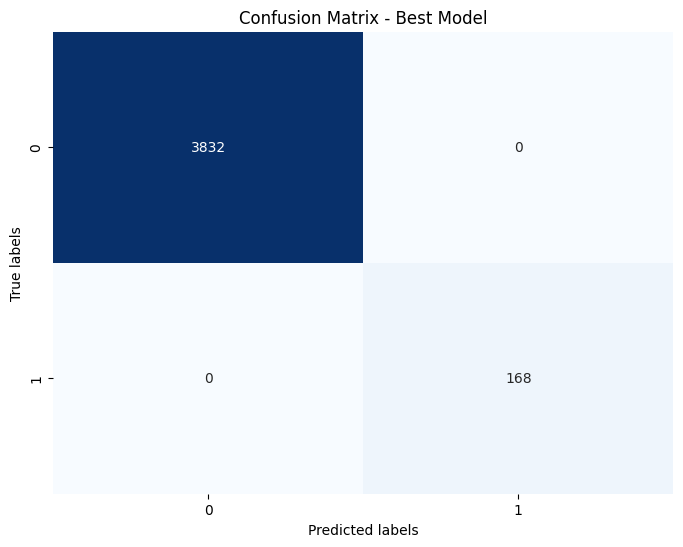

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Evaluate the models
accuracy_rf = accuracy_score(y_val, y_val_pred_rf2)
accuracy_gb = accuracy_score(y_val, y_val_pred_gb2)
accuracy_dt = accuracy_score(y_val, y_val_pred_dt2)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Gradient Boosting Accuracy: {accuracy_gb}')
print(f'Decision Tree Accuracy: {accuracy_dt}')

# Choose the best model based on accuracy
best_model = None
best_accuracy = 0

if accuracy_rf > best_accuracy:
    best_model = rf_model
    best_accuracy = accuracy_rf

if accuracy_gb > best_accuracy:
    best_model = gb_model
    best_accuracy = accuracy_gb

if accuracy_dt > best_accuracy:
    best_model = dt_model
    best_accuracy = accuracy_dt

print(f'Best Model Accuracy: {best_accuracy}')

# Predict and evaluate the best model
y_val_pred_best = best_model.predict(X_val)

# Classification report
print(classification_report(y_val, y_val_pred_best))

# Compute confusion matrix
conf_matrix_best = confusion_matrix(y_val, y_val_pred_best)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Best Model')
plt.show()

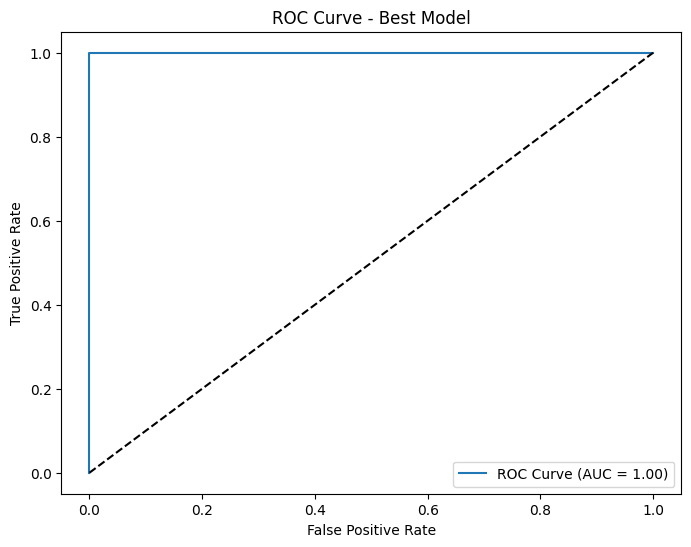

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

y_val_prob_best = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob_best)
roc_auc = roc_auc_score(y_val, y_val_prob_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Model')
plt.legend(loc='lower right')
plt.show()


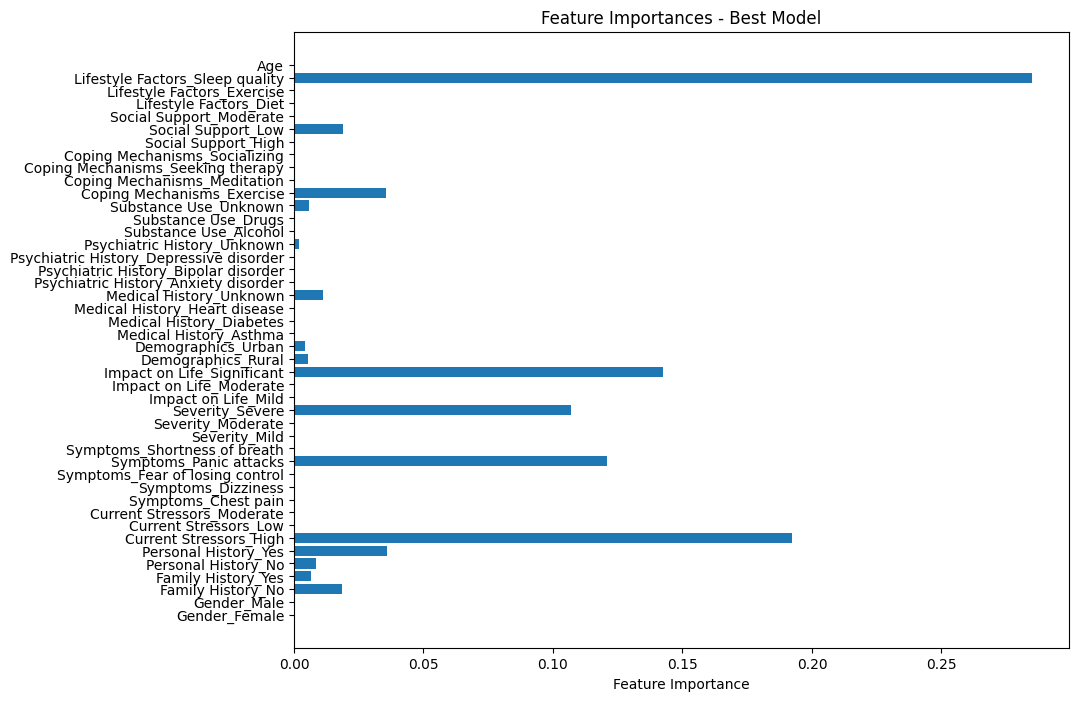

In [ ]:
feature_importances = best_model.feature_importances_
features = X_train_final.columns

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(features, feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importances - Best Model')
plt.show()


In [ ]:
import lime
import lime.lime_tabular

# Create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Class 0', 'Class 1'],  # Replace with actual class names
    mode='classification'
)


In [ ]:
# Select an instance from the test set
i = 0  # Index of the instance to explain
instance = X_test.iloc[i]

# Generate explanation
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=rf_model.predict_proba
)


In [ ]:
# Visualize the explanation
exp.show_in_notebook(show_table=True)
# To save the explanation as an HTML file
exp.save_to_file('lime_explanation.html')
